# Complex Sentiment Analysis

This notebook shows how to analyze a collection of passages like Tweets for sentiment.

This is based on Neal Caron's [An introduction to text analysis with Python, Part 3](http://nealcaren.web.unc.edu/an-introduction-to-text-analysis-with-python-part-3/).

This ultility example will look at:
- [Setting up our Data](#Setting-up-our-data)
- [Tokenizing Tweets](#Tokenizing-the-tweets)
- [Analyzing Tweets](#Analyzing-tweets)
- [Gathering Tweets](#Gathering-positive-tweets)
- [Testing Tweets (for positive and negative words)](#Testing-a-tweet)
- [Plotting words](#Gathering-and-plotting-all-positive-and-negative-words)

### Setting up our data

Here we will get the data to test and our positive and negative dictionaries.

** Getting by URL **

Here you can see how to get the data by URL. This shows just how to get the *negative.txt* file. The other files you need to get are *positive.txt* and *obama_tweets.txt*.

In [1]:
import urllib.request
path = 'http://www.unc.edu/~ncaren/haphazard/negative.txt'
with urllib.request.urlopen(path) as response:
    negData = response.read()
print(negData[:100])

b'abandoned\nabandonment\naberration\naberration\nabhorred\nabhorrence\nabhorrent\nabhorrently\nabhors\nabhors\n'


** Opening data files **

Instead of getting the data from the web in the script, I suggest you just download it and save it in the folder your script is in. Here are the links

- Positive data http://www.unc.edu/~ncaren/haphazard/positive.txt
- Negative data http://www.unc.edu/~ncaren/haphazard/negative.txt
- Obama tweets http://www.unc.edu/~ncaren/haphazard/obama_tweets.txt

Assuming you have saved in the folder with your script. Here is how to see what is in the folder.

In [2]:
%ls

Collocates-Copy1.ipynb          SimpleSentimentAnalysis.ipynb
Collocates.ipynb                Untitled.ipynb
ComplexSentimentAnalysis.ipynb  negative.txt
Handling Texts.ipynb            obama_tweets.txt
Hume Enquiry.txt                positive.txt
Hume Treatise.txt


Now we load the **negative** words.

In [3]:
with open("negative.txt", "r") as f:
    negText = f.read()
negTokens = negText.split("\n") # This splits the text file into tokens on the new line character
negTokens[-1:] = [] # This strips out the final empty item
print(negTokens[-10:])

['wretchedly', 'wretchedness', 'wrong', 'wrongful', 'wrought', 'wrought', 'yawn', 'zealot', 'zealous', 'zealously']


Here we load the **positive** words.

In [4]:
with open("positive.txt", "r") as f:
    posText = f.read()
posTokens = posText.split("\n") # This splits the text file into tokens on the new line character
posTokens[-1:] = [] # This strips out the final empty item
print(posTokens[-10:])

['worthwhile', 'worthy', 'wow', 'wry', 'yearning', 'yearningly', 'youthful', 'zeal', 'zenith', 'zest']


Here we get the **tweets**.

In [5]:
with open("obama_tweets.txt", "r") as f:
    tweetsText = f.read()
tweetsTokens = tweetsText.split("\n") # This splits the text file into tokens on the new line character
tweetsTokens[-1:] = [] # This strips out the final empty item
print(tweetsTokens[:2])

['Obama has called the GOP budget social Darwinism. Nice try, but they believe in social creationism.', 'In his teen years, Obama has been known to use marijuana and cocaine.']


### Tokenizing the tweets

Now we will create two <a href="Glossary.ipynb#Function" title="functions provide functionality to a program" >functions. </a> The first for tokenizing a tweet, the second for calculating positive/negative words.

In [6]:
import re
def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
    return theTokens

def calculator(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
    
    sum = (numPosWords - numNegWords)
    return sum

# Here is a line for testing this
# print(calculator('Obama has called wrong wrong the GOP budget social Darwinism. Nice try, but they believe in social creationism.'))


### Analyzing tweets

Now we will use the calculator to calculate how many positive and negative tweets.

*Note:* that you can set a **threshold** for the number of words for a Tweet to be considered positive or negative.

In [7]:
# Here we set up the thresholds
posi = 1 # This means there have to be more than 1 positive word
nega = 0 # This means there has to be more than 1 negative words

# Here we prime our variables
numTweets = 0
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc > posi:
        numPosTweets += 1
        numTweets += 1
    elif calc < nega:
        numNegTweets += 1
        numTweets += 1
    else:
        numNeutTweets += 1
        numTweets += 1

# This prints out the results        
print("Total: " + str(numTweets) + "\n" + "Positive: " + str(numPosTweets) + "\n" + "Neutral: " + str(numNeutTweets) + "\n" + "Negative: " +str(numNegTweets))

Total: 1380
Positive: 81
Neutral: 1047
Negative: 252


### Gathering positive tweets

This will gather all examples of positive tweets.

In [8]:
# Here we set up the threshold.
posi = 1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = 0
numPosTweets = 0
posiTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc > posi and numPosTweets < numberWanted:
        numPosTweets += 1
        posiTweetList.append(tweet)

print(posiTweetList)

["#WhatsRomneyHiding? Obama's dignity and sense of humor? #p2 #tcot", "RealClearPolitics - Obama's Organizational Advantage on Full ...: As a small but electorally significant state t... http://t.co/3Ax22aBB", "RT @wilycyotee Pres. Obama's ongoing support of women is another reason I am so proud he is my President!  @edshow #Obama2012", 'If Obama win 2012 Election wait til 2016 he will have full white hair! just like Bill clinton!']


### Gathering negative tweets

This will gather examples of negative tweets.

In [9]:
# Here we set up the threshold.
nega = -1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = 0
numNegTweets = 0
negaTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc < nega and numNegTweets < numberWanted:
        numNegTweets += 1
        negaTweetList.append(tweet)

print(negaTweetList)

['President Obama &lt; Lindsay Lohan RUMORS beginning cross shape lights on ST &lt; 1987 Analyst64 DC bicycle courier &lt; Video changes to scramble.', '@edshow the direspect of President #Obama is based on racism. They do not want a Black PRESIDENT. #edshow', '@JoeSixpackSays Our Troops NEED TO COME HOME !!!! BRING OUR TROOPS HOME NOW OBAMA YOU BASTARD OOOORAH SEMPER FI', 'Attorney Mario Apuzzo Files Ballot Access Challenge Against Obama Today in New Jersey http://t.co/06rD6lCL']


### Testing a tweet

Here you can take a tweet and test it to see how many positive or negative words it has.

In [10]:
tweetToCalc = input("What is the tweet to calculate? ")
print(calculator(tweetToCalc))

What is the tweet to calculate? the rest is ok bad bad bad
-3


### Gathering and plotting positive and negative words

This will gather the words that are positive in the tweets and tabulate them.

In [11]:
import re
posWordsList = []
negWordsList = []

def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
    return theTokens

def wordsCalculator(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            posWordsList.append(word)
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
            negWordsList.append(word)

tweet2Process = input("What tweet do you want to process? ")
wordsCalculator(tweet2Process)
print("Positive words: " + str(posWordsList[:10]))
print("Negative words: " + str(negWordsList[:10]))

What tweet do you want to process? 
Positive words: []
Negative words: []


## Gathering and plotting all positive and negative words

In [12]:
import re

# Here we set up the thresholds
posi = 1 # This means there have to be more than 1 positive word
nega = 0 # This means there has to be more than 1 negative words

# Here we prime our variables
posWordsList = []
negWordsList = []
numTweets = 0
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

def wordsGathering(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            posWordsList.append(word)
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
            negWordsList.append(word)       
    
    sum = (numPosWords - numNegWords)
    return sum

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = wordsGathering(tweet)
    if calc > posi:
        numPosTweets += 1
        numTweets += 1
    elif calc < nega:
        numNegTweets += 1
        numTweets += 1
    else:
        numNeutTweets += 1
        numTweets += 1

print("Positive words: " + str(len(posWordsList)))
print("Negative words: " + str(len(negWordsList)))

Positive words: 756
Negative words: 552


#### Positive words

     will      just   supreme     white important      good     right      nice  interest   support 
       66        44        32        31        26        18        17        17        16        16 


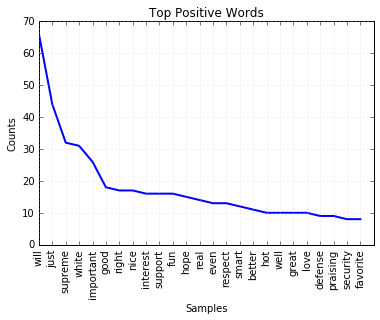

In [13]:
import nltk, matplotlib

posDist = nltk.FreqDist(posWordsList)
posDist.tabulate(10)

%matplotlib inline
posDist.plot(25, title="Top Positive Words")

#### Negative words

   need   bully against  trying     war    dumb    down  rumors     bad    less 
     26      19      14      13      11      11      11      10       9       8 


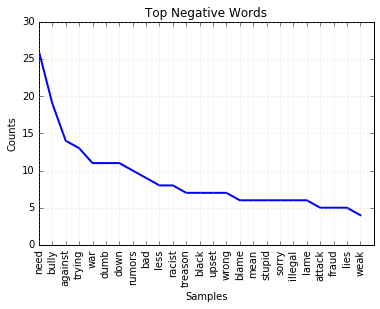

In [14]:
import nltk, matplotlib

negDist = nltk.FreqDist(negWordsList)
negDist.tabulate(10)

%matplotlib inline
negDist.plot(25, title="Top Negative Words")

## Next Steps

Let's explore another utility example - identifying [Collocates](Collocates.ipynb) for a target word.

---
[CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/) From [The Art of Literary Text Analysis](../ArtOfLiteraryTextAnalysis.ipynb) by [Stéfan Sinclair](http://stefansinclair.name) &amp; [Geoffrey Rockwell](http://geoffreyrockwell.com). Edited and revised by [Melissa Mony](http://melissamony.com). <br >Created August 8, 2014  (Jupyter 4.2.1)